In [1]:
import zipfile
import gzip
import shutil
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from kNNModel import kNNModel

## Exercise 3: MNIST k-NN classification (VG)

In this final exercise, we will use k-NN for classifying handwritten digits using the very famous MNIST dataset. Input to the algorithm is an image (28x28 pixel) with a handwritten digit (0-9) and the output should be a classification 0-9. The dataset and a description of it is available at http://yann.lecun.com/exdb/mnist/. Google MNIST Python to learn how to access it.  

The objective is to use your k-NN classifier to perform as good as possible on recognizing handwritten images. Describe your effort and what you found out to be the best k to lower the test error. The complete dataset has 60,000 digits for training and 10,000 digits for testing. Hence the computations might be heavy, so start of by a smaller subset rather than using the entire dataset. The final testing should (if possible) be done for the full test set but we will accept solutions that use "only" 10,000 digits for training and 1,000 digits for testing.  

The description of this exercise is deliberately vague as you are supposed to, on your own, find a suitable way to solve this problem in detail. This is why it is important that you document your effort and progress in your report.  

Finally, feel free to Google for help and ideas but make sure to mention what resources you have used in your report. Also, you are not allowed to use any of the predefined k-NN solvers available in Python. Use your own k-NN implementation. You might need to rewrite (i.e. optimize for performance) your Exercise 1 code in order to handle the heavy computations in a reasonable time.

### 1. Lets unpack data from the mnist.zip file

In [2]:
path = "./resources/datasets/MNIST"
with zipfile.ZipFile(f"{path}/mnist.zip", "r") as zip_ref:
    zip_ref.extractall(path)

datasets = [
    "train-images-idx3-ubyte",
    "train-labels-idx1-ubyte",
    "t10k-images-idx3-ubyte",
    "t10k-labels-idx1-ubyte",
]

for dataset in datasets:
    with gzip.open(f"{path}/{dataset}.gz", "rb") as f_in:
        with open(f"{path}/{dataset}", "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)


def read_idx(filename):
    with open("resources/datasets/MNIST/" + filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromfile(f, dtype=np.uint8).reshape(shape)


train_images = read_idx(datasets[0])[:60000]
train_labels = read_idx(datasets[1])[:60000]

test_images = read_idx(datasets[2])[:10000]
test_labels = read_idx(datasets[3])[:10000]

### 2. Now, let's instantiate our kNN Model and run calculations

For k = 1, Accuracy: 96.91%	For k = 3, Accuracy: 97.05%	For k = 5, Accuracy: 96.88%	For k = 7, Accuracy: 96.94%	For k = 9, Accuracy: 96.59%
For k = 11, Accuracy: 96.68%	For k = 13, Accuracy: 96.53%	For k = 15, Accuracy: 96.33%	For k = 17, Accuracy: 96.3%	For k = 19, Accuracy: 96.32%
For k = 21, Accuracy: 96.3%	For k = 23, Accuracy: 96.19%	For k = 25, Accuracy: 96.09%	For k = 27, Accuracy: 96.04%	For k = 29, Accuracy: 95.93%
For k = 31, Accuracy: 95.91%	For k = 33, Accuracy: 95.84%	For k = 35, Accuracy: 95.78%	For k = 37, Accuracy: 95.71%	For k = 39, Accuracy: 95.61%
For k = 41, Accuracy: 95.64%	For k = 43, Accuracy: 95.56%	For k = 45, Accuracy: 95.51%	For k = 47, Accuracy: 95.42%	For k = 49, Accuracy: 95.38%


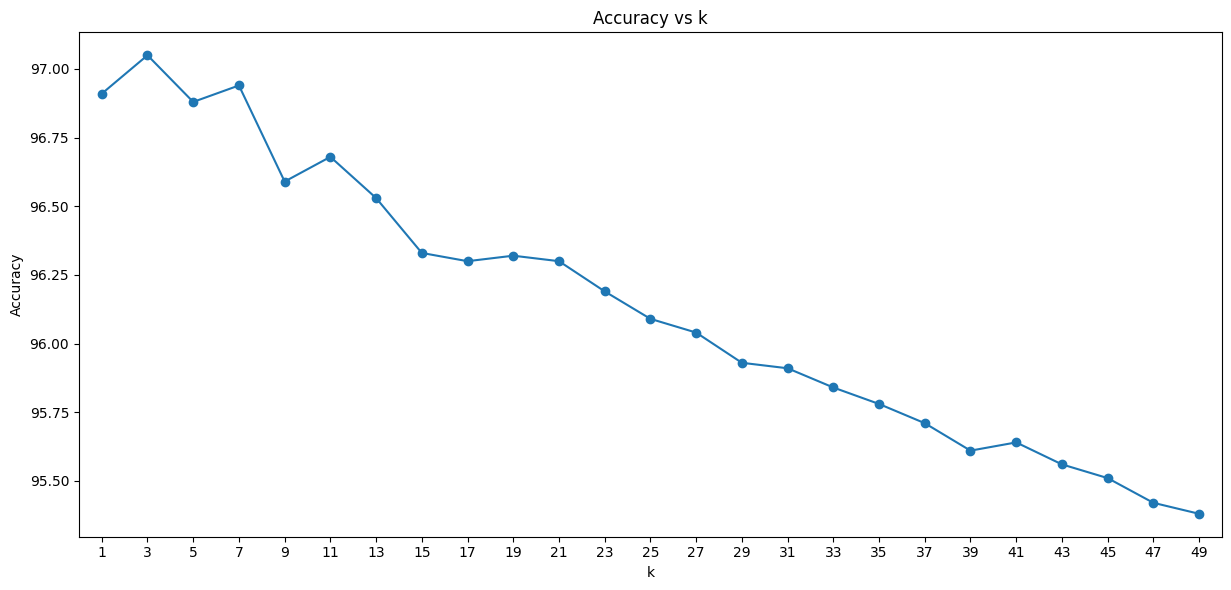

In [3]:
X_train = np.empty((len(train_images), 784), int)
for i, pixels28by28 in enumerate(train_images):
    X_train[i] = pixels28by28.flatten()

X_test = np.empty((len(test_images), 784), int)
for i, pixels28by28 in enumerate(test_images):
    X_test[i] = pixels28by28.flatten()

kNN = kNNModel()
kNN.fit(X_train, train_labels, X_test, test_labels)

k_values = list(range(1, 50, 2))

times = []
accuracies = []

for k in k_values:
    y_predicted = kNN.classify(X_test, k)
    accuracy = kNN.accuracy(y_predicted)
    accuracies.append(accuracy * 100)
    if (k+1) % 10 == 0:
        print(f"For k = {k}, Accuracy: {round(accuracy * 100, 2)}%")
    else:
        print(f"For k = {k}, Accuracy: {round(accuracy * 100, 2)}%", end="\t")

plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.xlim(0, max(k_values) + 1)

plt.tight_layout()
plt.show()


### 3. Analyze results

It takes approximately 8 minutes to run the calculations on my Mac Air M2 with a training dataset of 10K images and a testing dataset of 1K images.

<center><image src="./resources/images/MNIST-results.png" width="600"/></center>